<a href="https://colab.research.google.com/github/gitHasty-0321/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Steven_Hastings_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym  
from IPython.display import display,Math 
import pandas as pd 
from sympy import pretty_print as pp, latex
from sympy.abc import a, b, n
import string
from mpl_toolkits.mplot3d import Axes3D

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505,2400,3027,2798,3700,3250,2689]

# Measures of Centrality

### Mean

If we have a set of points N points denoted $x_i$, the mean is defined as

$$ \frac{1}{N} \sum_{i=1}^N x_i $$

A way to manually compute the mean is given by:

In [59]:
def get_mean(data):
    summed = 0
    for x in data:
        summed += x
    return summed / len(data)
print(get_mean(sales))

3052.714285714286


# Measures of balance

* Variance
* Standard deviation

### Variance

The variance of a distrbution is a measure of how much it spreads out around the mean. A touch more formally, its the expected value of the squared deviation from the mean. Even more formally, it is given by 

$$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2 $$

where $\mu$ is the mean of the dataset $x$, as described in the previous section. Note there is a fine point about whether you should divide by $N$ or $N-1$. Here is a manual way of calculating it:

In [60]:
def get_variance(data):
    mean = get_mean(data)
    summation = 0
    for x in data:
        summation += (x - mean)**2
    return summation / (len(data) - 1)
print(get_variance(sales))

214387.90476190473


#Standard Deviation

In [61]:
def get_standard_deviation(data):
  variance = get_variance(data)
  return variance**.5
print(get_standard_deviation(sales))

463.0204150595357


#Covariance 

$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

$$ Var^{a,b} = \frac{1}{N-1} \sum_{i=1}^N (x_i^a - \mu^a)(x_i^b - \mu^b), $$

$$ Cov = \begin{pmatrix} Var^{a,a} & Var^{a,b} \\ Var^{b,a} & Var^{b,b} \\ \end{pmatrix} $$


Notice how this is symmetric. $Var^{a,b} = Var^{b,a}$. And the diagonals are just the variance for each data vector. The off-diagonals are measure of the joint spread between the two.

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [62]:
import pandas as pd

customers = [127,80,105,92,120,115,93]

df = pd.DataFrame({"Number of Customers": customers, "Last Week Sales": sales})

covariance = df.cov()
print(covariance)

                     Number of Customers  Last Week Sales
Number of Customers           290.952381      7604.357143
Last Week Sales              7604.357143    214387.904762


In [63]:
np.cov(customers,sales,ddof=1)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [64]:
customers_std = get_standard_deviation(customers)
sales_std = get_standard_deviation(sales)

print(customers_std)
print(sales_std)

17.057326313123664
463.0204150595357


9## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

                     Number of Customers  Last Week Sales
Number of Customers             1.000000         0.962834
Last Week Sales                 0.962834         1.000000


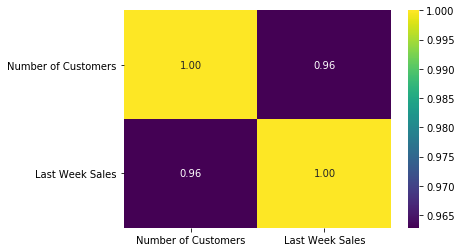

In [65]:
import seaborn as sns
sns.heatmap(df.corr(), annot= True, cmap="viridis", fmt="0.2f");

print(df.corr())

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

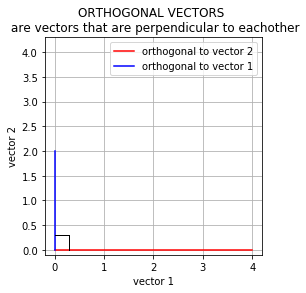

In [66]:
orth_vec1 = np.array([4,0])
orth_vec2 = np.array([0,2])

plt.plot([0,orth_vec1[0]],[0,orth_vec1[1]],'r',label= 'orthogonal to vector 2')
plt.plot([0,orth_vec2[0]],[0,orth_vec2[1]],'b',label= 'orthogonal to vector 1')

#adding 90 degree angle 
plt.plot([.3,.3],[0,.3],'k',linewidth=1)
plt.plot([0,.3],[.3,.3],'k',linewidth=1)

plt.legend()
plt.grid()
plt.axis('square')
plt.xlabel('vector 1')
plt.ylabel('vector 2')
plt.title('ORTHOGONAL VECTORS \n are vectors that are perpendicular to eachother')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

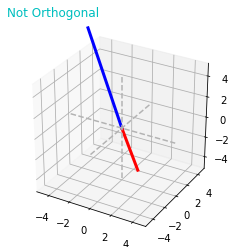

the two vectors are clearly not perpendicular to one another. 
 Furthermore their dot product does not equal 0 
 it equals -40


In [67]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])


fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')

# draw vectors
ax.plot([0,a[0]],[0,a[1]],[0,a[2]],'b',linewidth=3)
ax.plot([0,b[0]],[0,b[1]],[0,b[2]],'r',linewidth=3)

# guidelines
ax.plot([-5,5],[0,0],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[-5,5],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[0,0],[-5,5],'--',color=[.7,.7,.7])

ax.set_title('Not Orthogonal',color='c',loc='left')

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)
plt.show()

print(f"the two vectors are clearly not perpendicular to one another. \n Furthermore their dot product does not equal 0 \n it equals {np.dot(a,b)}")

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [68]:
c = np.array([2,-15,6,20])
  #Pythagorean theorem
print(np.linalg.norm(c))
  # this is doing the same thing that the first half of norm is doing
print(c*c)
  # this will provide the same result as the previous equation
print((c.T)*c)



25.787593916455254
[  4 225  36 400]
[  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$d = 7\hat{\imath}+12\hat{\jmath}$$

$$e = 2\hat{\imath}+11\hat{\jmath}-8\ {k}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [69]:
f = np.array([4,12,11,9,2])
# calculate norm of f or its length/magnitude
fnorm = np.linalg.norm(f)

print(fnorm)
# divide f by its norm and get unit vector f
np.divide(f,fnorm)

19.131126469708992


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

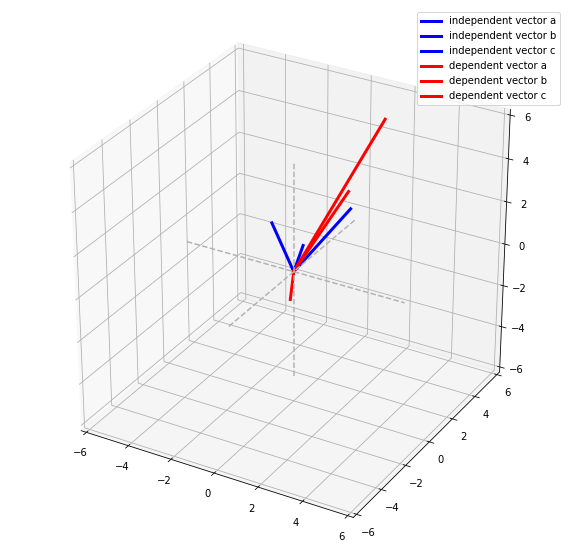

In [70]:
ind_a = np.array([1,-1,2])
ind_b = np.array([2,1,3])
ind_c = np.array([-1,0,2])

dep_a = np.array([1,-2,0])
dep_b = np.array([4,0,8])
dep_c = np.array([3,-1,5])


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# draw linearly independent vectors
ax.plot([0,ind_a[0]],[0,ind_a[1]],[0,ind_a[2]],'b',linewidth=3,label='independent vector a')
ax.plot([0,ind_b[0]],[0,ind_b[1]],[0,ind_b[2]],'b',linewidth=3,label='independent vector b')
ax.plot([0,ind_c[0]],[0,ind_c[1]],[0,ind_c[2]],'b',linewidth=3,label='independent vector c')

# draw linearly dependent vectors
ax.plot([0,dep_a[0]],[0,dep_a[1]],[0,dep_a[2]],'r',linewidth=3,label='dependent vector a')
ax.plot([0,dep_b[0]],[0,dep_b[1]],[0,dep_b[2]],'r',linewidth=3,label='dependent vector b')
ax.plot([0,dep_c[0]],[0,dep_c[1]],[0,dep_c[2]],'r',linewidth=3,label='dependent vector c')
# guidelines
ax.plot([-5,5],[0,0],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[-5,5],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[0,0],[-5,5],'--',color=[.7,.7,.7])

ax.legend()
ax.set_xlim3d(-6,6)
ax.set_ylim3d(-6,6)
ax.set_zlim3d(-6,6)
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
  # off the bat you can tell that these two vectors are linearly dependent
  # the span will all vectors whose tip sit on that line
g = np.array([1,2])
h = np.array([4,8])




## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

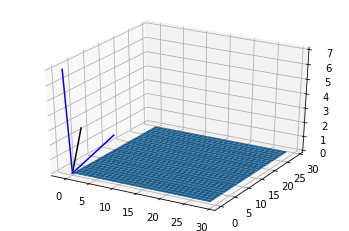

In [72]:
  #vectors l,m,n
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])

# set S
S1 = np.array([1, 1, 0])
S2 = np.array([1, 7, 0])



# draw vectors
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot([0, S1[0]],[0, S1[1]],[0, S1[2]],'r')
# ax.plot([0, S2[0]],[0, S2[1]],[0, S2[2]],'r')

ax.plot([0, l[0]],[0, l[1]],[0, l[2]],'k')
ax.plot([0, m[0]],[0, m[1]],[0, m[2]],'b')
ax.plot([0, n[0]],[0, n[1]],[0, n[2]],'b')
# now draw plane
xx, yy = np.meshgrid(range(30), range(30))
cp = np.cross(S1,S2)
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



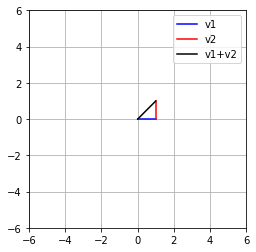

In [73]:
# two vectors that form a basis for R2
v1 = np.array([ 1, 0 ])
v2 = np.array([ 0,  1 ])

v3 = v1 + v2


# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
plt.plot([0, v2[0]]+v1[0],[0, v2[1]]+v1[1],'r',label='v2')
plt.plot([0, v3[0]],[0, v3[1]],'k',label='v1+v2')

plt.legend()
plt.axis('square')
plt.axis((-6, 6, -6, 6 ))
plt.grid()
plt.show()

## 6.2 What does it mean to form a basis?

creating the linearly independent set of vectors that span the given space.
the rock on which all is scaled. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [74]:
P = np.array([ [1,2,3],
              [-1,0,7],
              [4,8,2] ])

Prank = np.linalg.matrix_rank(P)
print(f'rank = {Prank}')

rank = 3


## 7.2 What does the rank of a matrix tell us?

it tells us the dimensionality of the information within the matrix.  
it can tell us whether or not the matrix is invertable.  
it can describe the shape of the matrix independence.  


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

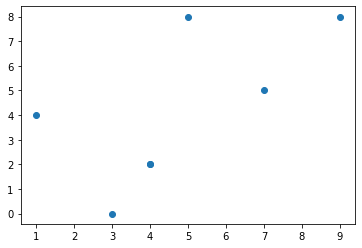

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()